In [1]:
from datasets import load_dataset
from datasets import Dataset
dataset = load_dataset('trec')
#display(dataset)
dataset = dataset.remove_columns("label-fine")
#display(dataset)
dataset = dataset.rename_column("label-coarse", "label")
display(dataset)


train_validation_ds = dataset['train'].shuffle(seed=42).select([i for i in list(range(5000))])
train_ds = Dataset.from_dict(train_validation_ds[0:4500])
validation_ds = Dataset.from_dict(train_validation_ds[4500:5000])
test_ds = dataset['test'].shuffle(seed=42).select([i for i in list(range(500))])

display(train_ds)
display(validation_ds)
display(test_ds)

C:\Users\DELL\anaconda3\envs\ta\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using custom data configuration default
Reusing dataset trec (C:\Users\DELL\.cache\huggingface\datasets\trec\default\1.1.0\751da1ab101b8d297a3d6e9c79ee9b0173ff94c4497b75677b59b61d5467a9b9)
100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 530.72it/s]


DatasetDict({
    train: Dataset({
        features: ['label', 'text'],
        num_rows: 5452
    })
    test: Dataset({
        features: ['label', 'text'],
        num_rows: 500
    })
})

Loading cached shuffled indices for dataset at C:\Users\DELL\.cache\huggingface\datasets\trec\default\1.1.0\751da1ab101b8d297a3d6e9c79ee9b0173ff94c4497b75677b59b61d5467a9b9\cache-bc761497303cb1ab.arrow
Loading cached shuffled indices for dataset at C:\Users\DELL\.cache\huggingface\datasets\trec\default\1.1.0\751da1ab101b8d297a3d6e9c79ee9b0173ff94c4497b75677b59b61d5467a9b9\cache-d432b7eeb4042bcd.arrow


Dataset({
    features: ['label', 'text'],
    num_rows: 4500
})

Dataset({
    features: ['label', 'text'],
    num_rows: 500
})

Dataset({
    features: ['label', 'text'],
    num_rows: 500
})

In [2]:
display(train_ds[0:5])

{'label': [0, 3, 2, 4, 1],
 'text': ['How can I transport files from one computer to another ?',
  'Who are the two sons of Ozzie and Harriet Nelson ?',
  'What does pH stand for ?',
  'How many people does Honda employ in the U.S. ?',
  "What newspaper returned a Pulitzer Prize for the fraudulent story Jimmy 's World ?"]}

In [3]:
display(validation_ds[0:5])

{'label': [1, 5, 4, 1, 1],
 'text': ['Which medium is Hamblen the first singing cowboy in ?',
  'What country was the setting of You Only Live Twice ?',
  'How many double-word-score spaces are there on a Scrabble Crossword Game board ?',
  'What is the nickname of the Cleveland Indians ?',
  'What drug is often used to treat AIDS patients ?']}

In [4]:
display(test_ds[0:5])

{'label': [4, 0, 1, 4, 1],
 'text': ['What is the population of Venezuela ?',
  'What does target heart rate mean ?',
  'What currency does Luxembourg use ?',
  'How long did Rip Van Winkle sleep ?',
  'Material called linen is made from what plant ?']}

In [5]:
#defining model:
from transformers import (AutoTokenizer, 
                          AutoModelForSequenceClassification, 
                          Trainer, EarlyStoppingCallback,
                          TrainingArguments)

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

tokenize_func = lambda sentences: tokenizer(sentences['text'], 
                                            padding='max_length', truncation=True, max_length = 50)




train_dataset = train_ds.map(tokenize_func, batched=True)
val_dataset = validation_ds.map(tokenize_func, batched=True)
test_dataset = test_ds.map(tokenize_func, batched=True)





100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 47.75ba/s]
Loading cached processed dataset at C:\Users\DELL\.cache\huggingface\datasets\trec\default\1.1.0\751da1ab101b8d297a3d6e9c79ee9b0173ff94c4497b75677b59b61d5467a9b9\cache-ef5ee882d466f5ad.arrow


In [6]:
dataset_for_name = load_dataset('trec')['train']
ds = dataset_for_name.map(tokenize_func, batched=True)

Using custom data configuration default
Reusing dataset trec (C:\Users\DELL\.cache\huggingface\datasets\trec\default\1.1.0\751da1ab101b8d297a3d6e9c79ee9b0173ff94c4497b75677b59b61d5467a9b9)
100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 1016.19it/s]
Loading cached processed dataset at C:\Users\DELL\.cache\huggingface\datasets\trec\default\1.1.0\751da1ab101b8d297a3d6e9c79ee9b0173ff94c4497b75677b59b61d5467a9b9\cache-ae9d89eecf260f3e.arrow


In [7]:
original_model_path = r'C:\Users\DELL\Text_Augmentation\Confusion Matrix\TREC\Original_model'
antonym2_run1_model_path = r'C:\Users\DELL\Text_Augmentation\Confusion Matrix\TREC\antonym2\run1'
antonym2_run2_model_path = r'C:\Users\DELL\Text_Augmentation\Confusion Matrix\TREC\antonym2\run2'
antonym2_run3_model_path = r'C:\Users\DELL\Text_Augmentation\Confusion Matrix\TREC\antonym2\run3'


original_model = AutoModelForSequenceClassification.from_pretrained(original_model_path, num_labels=6)
antonym2_run1_model = AutoModelForSequenceClassification.from_pretrained(antonym2_run1_model_path, num_labels=6)
antonym2_run2_model = AutoModelForSequenceClassification.from_pretrained(antonym2_run2_model_path, num_labels=6)
antonym2_run3_model = AutoModelForSequenceClassification.from_pretrained(antonym2_run3_model_path, num_labels=6)

In [8]:
import numpy as np
from datasets import load_metric
 
def compute_metrics(eval_pred):
   load_accuracy = load_metric("accuracy")
   load_f1 = load_metric("f1")
  
   logits, labels = eval_pred
   predictions = np.argmax(logits, axis=-1)
   accuracy = load_accuracy.compute(predictions=predictions, references=labels)["accuracy"]
   f1 = load_f1.compute(predictions=predictions, references=labels, average='macro')["f1"]
   return {"accuracy": accuracy, "f1": f1}
    
training_args = TrainingArguments(
    output_dir=r'C:\Users\DELL\Text_Augmentation\ag_news_dataset_3runs\models\original_model',          # output directory
    num_train_epochs=20,              # total number of training epochs
    per_device_train_batch_size=32,  # batch size per device during training
    per_device_eval_batch_size=32,   # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.1,               # strength of weight decay
    
    logging_dir=r'C:\Users\DELL\Text_Augmentation\ag_news_dataset_3runs\logs\original_model',            # directory for storing logs
    save_total_limit = 1,
    load_best_model_at_end=True,
    #metric_for_best_model='f1',
    evaluation_strategy='epoch',
    logging_strategy='epoch',
    save_strategy='epoch',
    gradient_accumulation_steps=2,
    learning_rate=2e-5,
)


original_model_trainer = Trainer(
    model=original_model, 
    args=training_args, 
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)


antonym2_run1_model_trainer = Trainer(
    model=antonym2_run1_model, 
    args=training_args, 
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

antonym2_run2_model_trainer = Trainer(
    model=antonym2_run2_model, 
    args=training_args, 
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

antonym2_run3_model_trainer = Trainer(
    model=antonym2_run3_model, 
    args=training_args, 
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

In [9]:
#evaluate:
original_model_trainer.evaluate(test_dataset)

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 500
  Batch size = 32


{'eval_loss': 0.14332188665866852,
 'eval_accuracy': 0.97,
 'eval_f1': 0.9553362604455932,
 'eval_runtime': 4.2663,
 'eval_samples_per_second': 117.198,
 'eval_steps_per_second': 3.75}

In [10]:
#evaluate:
antonym2_run1_model_trainer.evaluate(test_dataset)

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 500
  Batch size = 32


{'eval_loss': 0.13169097900390625,
 'eval_accuracy': 0.974,
 'eval_f1': 0.9472933261049511,
 'eval_runtime': 2.765,
 'eval_samples_per_second': 180.834,
 'eval_steps_per_second': 5.787}

In [11]:
#evaluate:
antonym2_run2_model_trainer.evaluate(test_dataset)

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 500
  Batch size = 32


{'eval_loss': 0.1415802389383316,
 'eval_accuracy': 0.968,
 'eval_f1': 0.9426171650090694,
 'eval_runtime': 3.1171,
 'eval_samples_per_second': 160.407,
 'eval_steps_per_second': 5.133}

In [12]:
#evaluate:
antonym2_run3_model_trainer.evaluate(test_dataset)

The following columns in the evaluation set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 500
  Batch size = 32


{'eval_loss': 0.14615848660469055,
 'eval_accuracy': 0.97,
 'eval_f1': 0.9441683136248759,
 'eval_runtime': 2.7627,
 'eval_samples_per_second': 180.979,
 'eval_steps_per_second': 5.791}

In [13]:
original_model_preds_output = original_model_trainer.predict(test_dataset)
antonym2_run1_model_preds_output = antonym2_run1_model_trainer.predict(test_dataset)
antonym2_run2_model_preds_output = antonym2_run2_model_trainer.predict(test_dataset)
antonym2_run3_model_preds_output = antonym2_run3_model_trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32
The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32
The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 3

In [14]:
original_model_trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32


PredictionOutput(predictions=array([[-1.2588488 , -1.1574166 , -1.5501248 , -1.0144421 ,  5.4462967 ,
        -1.3592685 ],
       [ 3.2169764 , -1.89689   ,  1.6110189 , -1.5687724 , -1.2329297 ,
        -1.4518372 ],
       [-1.4496993 ,  5.47695   , -2.093181  , -1.1066086 , -1.4154886 ,
        -0.5255532 ],
       ...,
       [-1.1994388 ,  5.2170186 , -2.1272748 ,  0.08378818, -1.7651105 ,
        -1.5658152 ],
       [-0.6559759 ,  5.4272037 , -2.1113684 , -1.2872524 , -1.7422091 ,
        -0.9805429 ],
       [-1.0129477 , -1.1049347 , -1.9090977 , -1.382437  , -1.7257832 ,
         5.475223  ]], dtype=float32), label_ids=array([4, 0, 1, 4, 1, 0, 1, 0, 0, 5, 1, 0, 4, 1, 1, 3, 5, 4, 3, 4, 0, 1,
       5, 3, 4, 4, 5, 5, 3, 5, 1, 4, 1, 3, 4, 5, 0, 4, 0, 0, 0, 2, 0, 4,
       3, 0, 4, 1, 0, 4, 1, 4, 1, 5, 4, 0, 0, 4, 5, 1, 5, 0, 1, 3, 0, 3,
       3, 3, 0, 4, 1, 1, 5, 5, 5, 0, 1, 4, 0, 5, 0, 1, 1, 4, 0, 4, 0, 0,
       0, 3, 0, 5, 1, 4, 4, 1, 4, 3, 4, 5, 0, 0, 0, 0, 3, 3, 1, 4, 0, 

In [15]:
antonym2_run1_model_trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32


PredictionOutput(predictions=array([[-0.88474226, -0.97167987, -1.314814  , -0.82701075,  4.36231   ,
        -1.0397121 ],
       [ 3.0616267 , -1.092735  ,  0.466967  , -1.2595048 , -1.0460637 ,
        -1.3585209 ],
       [-0.7451225 ,  4.5002174 , -1.5775815 , -0.7790631 , -1.5180364 ,
        -0.33349073],
       ...,
       [-0.7230567 ,  2.862524  , -1.9152582 ,  1.9320178 , -1.7089112 ,
        -1.6131606 ],
       [ 0.58107764,  3.8735213 , -1.5168413 , -1.0594339 , -1.5605955 ,
        -1.2032526 ],
       [ 0.16149682, -1.0414264 , -1.40127   , -1.2826724 , -1.5735357 ,
         4.2963586 ]], dtype=float32), label_ids=array([4, 0, 1, 4, 1, 0, 1, 0, 0, 5, 1, 0, 4, 1, 1, 3, 5, 4, 3, 4, 0, 1,
       5, 3, 4, 4, 5, 5, 3, 5, 1, 4, 1, 3, 4, 5, 0, 4, 0, 0, 0, 2, 0, 4,
       3, 0, 4, 1, 0, 4, 1, 4, 1, 5, 4, 0, 0, 4, 5, 1, 5, 0, 1, 3, 0, 3,
       3, 3, 0, 4, 1, 1, 5, 5, 5, 0, 1, 4, 0, 5, 0, 1, 1, 4, 0, 4, 0, 0,
       0, 3, 0, 5, 1, 4, 4, 1, 4, 3, 4, 5, 0, 0, 0, 0, 3, 3, 1, 4, 0, 

In [16]:
antonym2_run2_model_trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32


PredictionOutput(predictions=array([[-0.97621274, -1.2094626 , -1.4313229 , -0.9928111 ,  5.0696626 ,
        -1.3127296 ],
       [ 3.7780485 , -1.2981215 ,  0.4281034 , -1.7589998 , -1.3927803 ,
        -1.5065285 ],
       [-0.86826587,  5.0308204 , -1.5894836 , -1.4257126 , -1.4723034 ,
        -0.4432268 ],
       ...,
       [-0.95078856,  4.739015  , -1.6286466 ,  0.04568754, -1.8712976 ,
        -1.1789925 ],
       [ 0.11275192,  4.7084556 , -1.6558776 , -1.4271339 , -1.8529565 ,
        -0.8960869 ],
       [-0.2709557 , -1.4300777 , -1.7147576 , -1.2827594 , -1.7620684 ,
         4.970012  ]], dtype=float32), label_ids=array([4, 0, 1, 4, 1, 0, 1, 0, 0, 5, 1, 0, 4, 1, 1, 3, 5, 4, 3, 4, 0, 1,
       5, 3, 4, 4, 5, 5, 3, 5, 1, 4, 1, 3, 4, 5, 0, 4, 0, 0, 0, 2, 0, 4,
       3, 0, 4, 1, 0, 4, 1, 4, 1, 5, 4, 0, 0, 4, 5, 1, 5, 0, 1, 3, 0, 3,
       3, 3, 0, 4, 1, 1, 5, 5, 5, 0, 1, 4, 0, 5, 0, 1, 1, 4, 0, 4, 0, 0,
       0, 3, 0, 5, 1, 4, 4, 1, 4, 3, 4, 5, 0, 0, 0, 0, 3, 3, 1, 4, 0, 

In [17]:
antonym2_run3_model_trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32


PredictionOutput(predictions=array([[-0.86005795, -1.26748   , -1.4168628 , -1.0276554 ,  5.0267653 ,
        -1.3160105 ],
       [ 3.8604403 , -1.2464334 ,  0.36757454, -1.551354  , -1.6308429 ,
        -1.5178837 ],
       [-0.86973757,  5.121088  , -1.6796865 , -1.2805601 , -1.5035269 ,
        -0.51093113],
       ...,
       [-1.0628301 ,  3.5430298 , -1.9262702 ,  1.8019997 , -1.9188107 ,
        -1.5249093 ],
       [ 0.06917276,  4.659582  , -1.7366203 , -1.3841002 , -1.6854739 ,
        -0.93137574],
       [-0.19473828, -1.6235545 , -1.6451346 , -1.2512234 , -1.7170618 ,
         4.8730607 ]], dtype=float32), label_ids=array([4, 0, 1, 4, 1, 0, 1, 0, 0, 5, 1, 0, 4, 1, 1, 3, 5, 4, 3, 4, 0, 1,
       5, 3, 4, 4, 5, 5, 3, 5, 1, 4, 1, 3, 4, 5, 0, 4, 0, 0, 0, 2, 0, 4,
       3, 0, 4, 1, 0, 4, 1, 4, 1, 5, 4, 0, 0, 4, 5, 1, 5, 0, 1, 3, 0, 3,
       3, 3, 0, 4, 1, 1, 5, 5, 5, 0, 1, 4, 0, 5, 0, 1, 1, 4, 0, 4, 0, 0,
       0, 3, 0, 5, 1, 4, 4, 1, 4, 3, 4, 5, 0, 0, 0, 0, 3, 3, 1, 4, 0, 

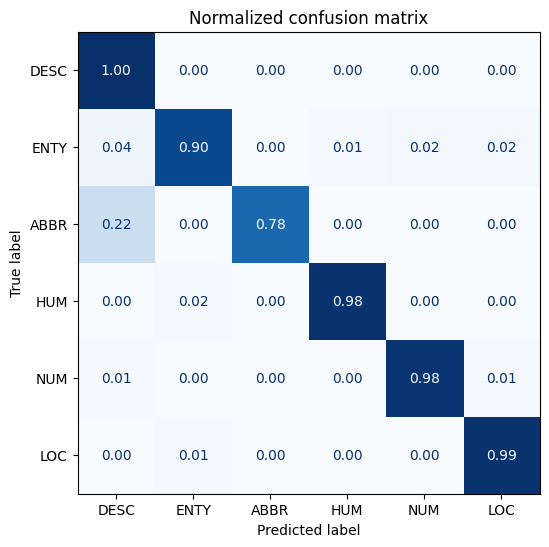

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_preds = np.argmax(original_model_preds_output.predictions, axis=1)
y_valid = np.array(test_dataset["label"])
labels = ds.features["label-coarse"].names

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)

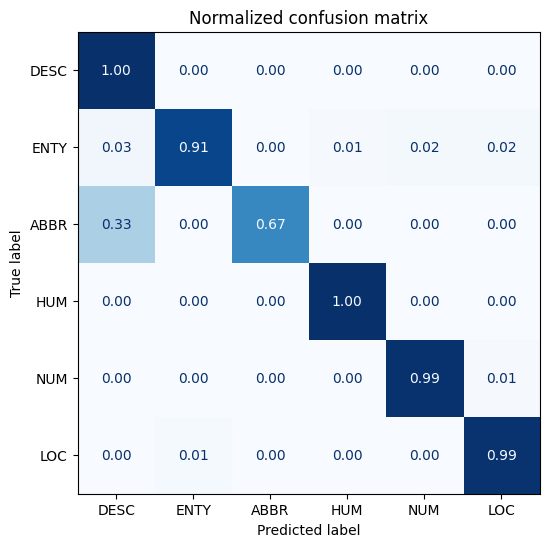

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_preds = np.argmax(antonym2_run1_model_preds_output.predictions, axis=1)
y_valid = np.array(test_dataset["label"])
labels = ds.features["label-coarse"].names

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)

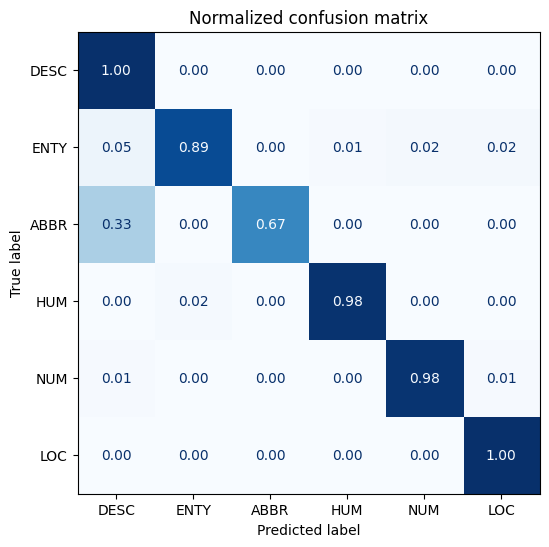

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_preds = np.argmax(antonym2_run2_model_preds_output.predictions, axis=1)
y_valid = np.array(test_dataset["label"])
labels = ds.features["label-coarse"].names

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)

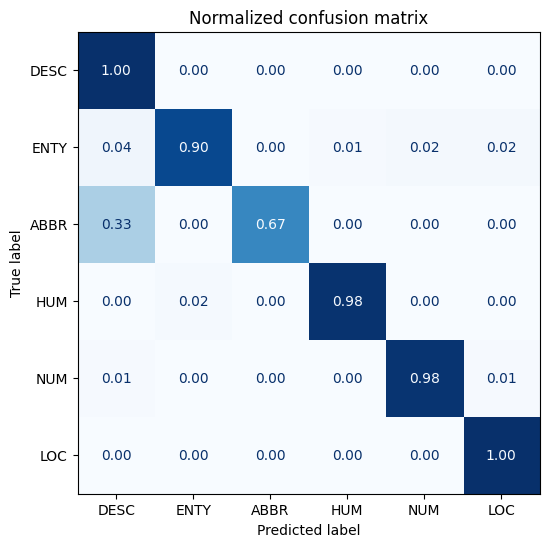

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_preds = np.argmax(antonym2_run3_model_preds_output.predictions, axis=1)
y_valid = np.array(test_dataset["label"])
labels = ds.features["label-coarse"].names

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)

In [22]:
antonym3_run1_model_path = r'C:\Users\DELL\Text_Augmentation\Confusion Matrix\TREC\antonym3_run1'
antipode3_run3_model_path = r'C:\Users\DELL\Text_Augmentation\Confusion Matrix\TREC\antipode3_run3'

antonym3_run1_model = AutoModelForSequenceClassification.from_pretrained(antonym3_run1_model_path, num_labels=6)
antipode3_run3_model = AutoModelForSequenceClassification.from_pretrained(antipode3_run3_model_path, num_labels=6)


loading configuration file C:\Users\DELL\Text_Augmentation\Confusion Matrix\TREC\antonym3_run1\config.json
Model config DistilBertConfig {
  "_name_or_path": "C:\\Users\\DELL\\Text_Augmentation\\Confusion Matrix\\TREC\\antonym3_run1",
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5"
  },
  "initializer_range": 0.02,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_2": 2,
    "LABEL_3": 3,
    "LABEL_4": 4,
    "LABEL_5": 5
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "

In [23]:
antonym3_run1_model_trainer = Trainer(
    model=antonym3_run1_model, 
    args=training_args, 
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

antipode3_run3_model_trainer = Trainer(
    model=antipode3_run3_model, 
    args=training_args, 
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)

In [24]:
antonym3_run1_model_preds_output = antonym3_run1_model_trainer.predict(test_dataset)
antipode3_run3_model_preds_output = antipode3_run3_model_trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32


The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32


In [25]:
antonym3_run1_model_trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32


PredictionOutput(predictions=array([[-1.0657964 , -0.9357537 , -1.2201035 , -0.71057963,  4.3164563 ,
        -1.0221244 ],
       [ 3.1368656 , -1.3572396 ,  0.2607401 , -1.1653206 , -0.97740793,
        -1.1098636 ],
       [-1.2208154 ,  4.082884  , -1.3846486 , -0.8662615 , -1.2620417 ,
         0.24135277],
       ...,
       [-1.1072264 ,  0.07866354, -1.4704003 ,  4.090596  , -1.3378016 ,
        -1.2391683 ],
       [-0.36153916,  4.1049137 , -1.456044  , -1.3499345 , -1.1570196 ,
        -0.50239   ],
       [-0.4503553 , -1.3257308 , -1.4243271 , -0.924846  , -1.3529615 ,
         4.5289793 ]], dtype=float32), label_ids=array([4, 0, 1, 4, 1, 0, 1, 0, 0, 5, 1, 0, 4, 1, 1, 3, 5, 4, 3, 4, 0, 1,
       5, 3, 4, 4, 5, 5, 3, 5, 1, 4, 1, 3, 4, 5, 0, 4, 0, 0, 0, 2, 0, 4,
       3, 0, 4, 1, 0, 4, 1, 4, 1, 5, 4, 0, 0, 4, 5, 1, 5, 0, 1, 3, 0, 3,
       3, 3, 0, 4, 1, 1, 5, 5, 5, 0, 1, 4, 0, 5, 0, 1, 1, 4, 0, 4, 0, 0,
       0, 3, 0, 5, 1, 4, 4, 1, 4, 3, 4, 5, 0, 0, 0, 0, 3, 3, 1, 4, 0, 

In [26]:
antipode3_run3_model_trainer.predict(test_dataset)

The following columns in the test set don't have a corresponding argument in `DistilBertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `DistilBertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 500
  Batch size = 32


PredictionOutput(predictions=array([[-0.9692176 , -1.1675701 , -1.4176728 , -1.0497813 ,  5.068701  ,
        -1.2914292 ],
       [ 3.8363187 , -1.1668645 ,  0.32700828, -1.4746684 , -1.5956075 ,
        -1.4096787 ],
       [-0.99079585,  4.9702806 , -1.6729021 , -1.1157427 , -1.6334383 ,
        -0.19700578],
       ...,
       [-1.1890469 ,  4.305768  , -1.7733159 ,  0.82450265, -1.7888408 ,
        -1.3939207 ],
       [ 0.02942749,  4.7608347 , -1.7925458 , -1.3916767 , -1.5751888 ,
        -1.0756233 ],
       [ 0.01363576, -1.2873288 , -1.6835083 , -1.3138427 , -1.7346613 ,
         4.74487   ]], dtype=float32), label_ids=array([4, 0, 1, 4, 1, 0, 1, 0, 0, 5, 1, 0, 4, 1, 1, 3, 5, 4, 3, 4, 0, 1,
       5, 3, 4, 4, 5, 5, 3, 5, 1, 4, 1, 3, 4, 5, 0, 4, 0, 0, 0, 2, 0, 4,
       3, 0, 4, 1, 0, 4, 1, 4, 1, 5, 4, 0, 0, 4, 5, 1, 5, 0, 1, 3, 0, 3,
       3, 3, 0, 4, 1, 1, 5, 5, 5, 0, 1, 4, 0, 5, 0, 1, 1, 4, 0, 4, 0, 0,
       0, 3, 0, 5, 1, 4, 4, 1, 4, 3, 4, 5, 0, 0, 0, 0, 3, 3, 1, 4, 0, 

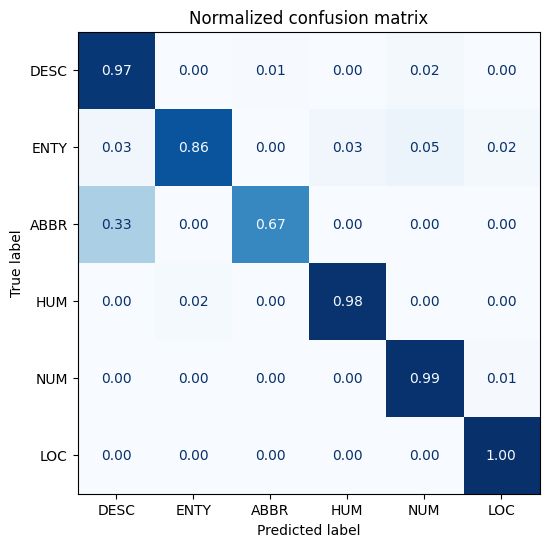

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_preds = np.argmax(antonym3_run1_model_preds_output.predictions, axis=1)
y_valid = np.array(test_dataset["label"])
labels = ds.features["label-coarse"].names

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)

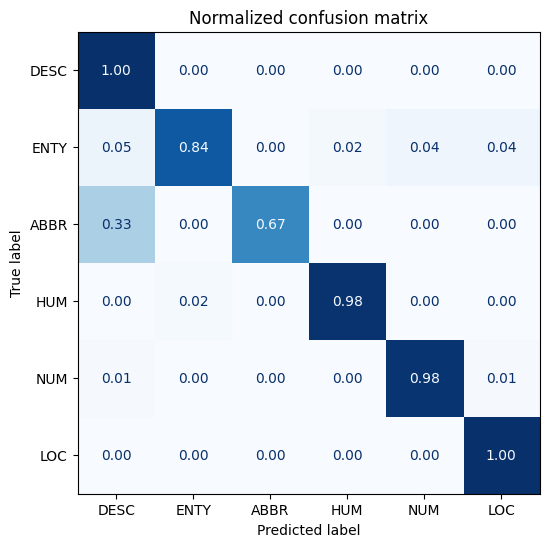

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_preds = np.argmax(antipode3_run3_model_preds_output.predictions, axis=1)
y_valid = np.array(test_dataset["label"])
labels = ds.features["label-coarse"].names

def plot_confusion_matrix(y_preds, y_true, labels):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(y_preds, y_valid, labels)